In [138]:
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import traceback
import logging
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
service = Service(executable_path=r"C:\Users\chira\Coding ninjas Data Science\BeautiFul Soup\Selenium\chrome driver\chromedriver_win32\chromedriver.exe")
driver = webdriver.Chrome(service = service)

In [3]:
wait = WebDriverWait(driver,10)

## function to go to a url

In [4]:
def visit_url(driver_,url):
    driver_.get(url)

## Function to login to Instagram


In [5]:
def insta_login(driver,uname,passw):
    
    driver.get('https://www.instagram.com')
    try:
        name_field = wait.until(EC.presence_of_element_located((By.NAME,"username")))
        pass_field = wait.until(EC.presence_of_element_located((By.NAME,"password")))
        name_field.send_keys(uname)
        pass_field.send_keys(passw)
        pass_field.submit()
    except Exception as e:
        logging.error(traceback.format_exc())
    
    
    

In [6]:
# visit_url(driver,'https://www.instagram.com')
# time.sleep(5)
insta_login(driver,'trunksgeta','godtrunks')

# Searching "food" and finding Top 5 handles with most followers out of top 10 handles in search result. Finding Number of posts in past three days by those 5 handles, and plotting this data.

### Function to search a word and return the top n handles, present in search result

In [7]:
def search_and_return(word,n,driver):
    
    driver.refresh()
    time.sleep(5)
    home = driver.find_element(By.CLASS_NAME,'_aacp')
    home.click()
    handles = []
    try:
        side_buttons = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_aacp')))
        search_button = side_buttons[1]
        search_button.click()
        
        try:
            search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aauy')))
            search_box.send_keys(word)
            
            time.sleep(5)
            
            try:
                results = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[@class="_abm4"]//div[contains(@class,"_aad6") and contains(@class,"_aaco")]'))) 
                i = 0
                for r in results:
                    if r.text == '':
                        continue
                    if r.text[0] == '#':
                        continue
                    i += 1
                    handles.append(r.text)
                    if i==n :
                        break
                return handles
            except Exception as e:
                logging.error(traceback.format_exc())      
        except Exception as e:
            logging.error(traceback.format_exc())
    except Exception as e:
        logging.error(traceback.format_exc())
    
    
    

## Finding the Top 10 Handles when 'food' is searched

In [10]:
search_results = search_and_return('food',10,driver)

In [11]:
for i in range(len(search_results)):
    print(i + 1,"---->",search_results[i])

1 ----> foodiesdelhite
2 ----> foodisnirvana
3 ----> foodpandits
4 ----> foodieveggie
5 ----> foodbellydelites
6 ----> food_and_makeup_lover
7 ----> food
8 ----> foodtalkindia
9 ----> punjabi_food_factory
10 ----> thefoodsquare_guna


## Function to go to profile page of a particular handle

In [12]:
def go_to_profile(handle,driver):
    
    driver.refresh()
    time.sleep(5)
    home = driver.find_element(By.CLASS_NAME,'_aacp')
    home.click()
    time.sleep(5)
    try:
        side_buttons = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_aacp')))
        search_button = side_buttons[1]
        search_button.click()
        
        try:
            search_box = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aauy')))
            search_box.send_keys(handle)
            
#             time.sleep(10)
            
            try:
                results = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[@class="_abm4"]//div[contains(@class,"_aad6") and contains(@class,"_aaco")]'))) 
                found = False
                for r in results:
                    if r.text == '':
                        continue
                    if r.text[0] == '#':
                        continue
                    if r.text == handle:
                        found = True
                        print("Handle found, going to profile page")
                        r.click()
                        break
                    
                if found == False:
                    print("Required Handle not found")
            except Exception as e:
                logging.error(traceback.format_exc())      
        except Exception as e:
            logging.error(traceback.format_exc())
    except Exception as e:
        logging.error(traceback.format_exc())
    
    
    
    

### Function to remove all occurences of a character from a word

In [13]:
def removechar(word, ch): #removes character ch from word
    i = 0
    while(i < len(word)):
     
        if(word[i] == ch):
            word = word[:i] + word[i+1:]
            i -= 1
        i += 1
    return word

### Function to get number of Followers and Following

In [15]:
def get_count_ff(driver): #Find the number of followers and following from profile page on which user is currently on
    
    pfF = driver.find_elements(By.CLASS_NAME,"_ac2a")
    if len(pfF)<3 :
        return 0,0
    
    p = pfF[0].text
    f = pfF[1].text
    F = pfF[2].text
    
#     print(f)
#     print(F)
    f = removechar(f,',')
    F = removechar(F,',')
#     print("___________________")
#     print(f)
#     print(F)
    
    if f[-1] == 'K':
        f = float(f[0:-1:1])
        f = f*1000
    elif f[-1] == 'M':
        f = float(f[0:-1:1])
        f = f*1000000
    else:
        f = int(f)
    
    if F[-1] == 'K':
        F = float(F[0:-1:1])
        F = F*1000
    elif F[-1] == 'M':
        F = float(F[0:-1:1])
        F = F*1000000
    else:
        F = float(F)
    
    return f,F
    
    

In [16]:
followers = []
for i in range(0,len(search_results)):
    print(" trying for going to profile of ",search_results[i])
    go_to_profile(search_results[i],driver) #go to profile page
    time.sleep(5) #wait for page to load
    f,F = get_count_ff(driver) # find number of followers and following
    followers.append((search_results[i],f)) # appending account name and number of followers in as a tuple in a list
    print(search_results[i]," has ",f," followers. ")

 trying for going to profile of  foodiesdelhite
Handle found, going to profile page
foodiesdelhite  has  23400.0  followers. 
 trying for going to profile of  foodisnirvana
Handle found, going to profile page
foodisnirvana  has  20200.0  followers. 
 trying for going to profile of  foodpandits
Handle found, going to profile page
foodpandits  has  183000.0  followers. 
 trying for going to profile of  foodieveggie
Handle found, going to profile page
foodieveggie  has  6745  followers. 
 trying for going to profile of  foodbellydelites
Handle found, going to profile page
foodbellydelites  has  7176  followers. 
 trying for going to profile of  food_and_makeup_lover
Handle found, going to profile page
food_and_makeup_lover  has  13600.0  followers. 
 trying for going to profile of  food
Handle found, going to profile page
food  has  182000.0  followers. 
 trying for going to profile of  foodtalkindia
Handle found, going to profile page
foodtalkindia  has  0  followers. 
 trying for going 

In [17]:
for i,j in followers:
    print(i,j)

foodiesdelhite 23400.0
foodisnirvana 20200.0
foodpandits 183000.0
foodieveggie 6745
foodbellydelites 7176
food_and_makeup_lover 13600.0
food 182000.0
foodtalkindia 0
punjabi_food_factory 2572
thefoodsquare_guna 1746


In [18]:
followers.sort(key = lambda x:x[1],reverse = True) #Sorting the list made by number of followers in decreasing order

In [19]:
for i,j in followers:
    print(i,j)

foodpandits 183000.0
food 182000.0
foodiesdelhite 23400.0
foodisnirvana 20200.0
food_and_makeup_lover 13600.0
foodbellydelites 7176
foodieveggie 6745
punjabi_food_factory 2572
thefoodsquare_guna 1746
foodtalkindia 0


In [20]:
top_5_profiles = followers[:5]
print("The 5 profiles with the most number of followers : ")
for i in top_5_profiles:
    print(i[0])

The 5 profiles with the most number of followers : 
foodpandits
food
foodiesdelhite
foodisnirvana
food_and_makeup_lover


### Function to find the number of posts in past n days

In [ ]:
def find_number_of_posts(driver): # Find the number of posts by the account that driver is currenly on
    
    try:
        posts = wait.until(EC.get_all_elements_located((By.CLASS_NAME,"_aa")))
    

In [23]:
date_of_post = driver.find_element(By.CLASS_NAME,"_aaqe")

In [24]:
dt = date_of_post.get_attribute('datetime')

In [25]:
dt

'2023-02-04T13:04:44.000Z'

In [26]:
type(dt)

str

In [29]:
todays_date = date.today()

In [30]:
dt = dt[0:10]

In [31]:
dt

'2023-02-04'

In [44]:
post_date = datetime.strptime(dt,"%Y-%m-%d")
post_date = datetime.date(post_date)

In [45]:
post_date

datetime.date(2023, 2, 4)

In [46]:
diff = todays_date - post_date

In [48]:
diff.days

4

In [49]:
diff.seconds

0

In [50]:
diff.days

4

### Function to find the number of posts in past n days

In [52]:
def posts_in_n_days(driver,n):
    
    date_of_post = date.today()
    todays_date = date.today()
    posts = []
    
    while True:
        try:
            time.sleep(5)
            posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagw")))
            last_post = posts[-1]
            time.sleep(5)
            last_post.click()
            try :
                date_of_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_aaqe")))
                date_of_post = date_of_post.get_attribute('datetime')
                date_of_post = date_of_post[0:10]
                date_of_post = datetime.strptime(date_of_post,"%Y-%m-%d")
                date_of_post = datetime.date(date_of_post)
                diff = (todays_date - date_of_post).days
                close = driver.find_element(By.XPATH,"//*[@aria-label='Close']")
                close.click()
                if diff > n:
                    break
                else :
                    print(" scrolling ")
                    driver.execute_script("window.scrollBy(0,1000)")
            except Exception as e:
                logging.error(traceback.format_exc()) 
        except Exception as e:
            logging.error(traceback.format_exc()) 
            
    
    
    
    print("*************done*****************")
    
    try:
        time.sleep(5)
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagw")))
    except Exception as e:
        logging.error(traceback.format_exc())
    l = len(posts)
    i = l - 1
    
    while i>=0 :
        current_post = posts[i]
        current_post.click()
        try:
            date_of_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_aaqe")))
            date_of_post = date_of_post.get_attribute('datetime')
            date_of_post = date_of_post[0:10]
            date_of_post = datetime.strptime(date_of_post,"%Y-%m-%d")
            date_of_post = datetime.date(date_of_post)
            diff = (todays_date - date_of_post).days
            if diff<=n :
                close = driver.find_element(By.XPATH,"//*[@aria-label='Close']")
                close.click()
                break
        except Exception as e:
            logging.error(traceback.format_exc())
        close = driver.find_element(By.XPATH,"//*[@aria-label='Close']")
        close.click()
        i = i - 1
            
    
    return i + 1
    
    
    
    

In [53]:
for i in range(5):
    print(" i ---> ",i)
    go_to_profile(top_5_profiles[i][0],driver)
    x = posts_in_n_days(driver,3)
    top_5_profiles[i] = (top_5_profiles[i][0],top_5_profiles[i][1],x)

 i --->  0
Handle found, going to profile page
*************done*****************
 i --->  1
Handle found, going to profile page
*************done*****************
 i --->  2
Handle found, going to profile page
*************done*****************
 i --->  3
Handle found, going to profile page
*************done*****************
 i --->  4
Handle found, going to profile page
*************done*****************


In [84]:
for i in top_5_profiles :
    print(i)

('foodpandits', 183000.0, 12)
('food', 182000.0, 2)
('foodiesdelhite', 23400.0, 0)
('foodisnirvana', 20200.0, 0)
('food_and_makeup_lover', 13600.0, 0)


In [88]:
profile_and_post = np.array(top_5_profiles)

In [89]:
profile_and_post.shape

(5, 3)

In [90]:
x = profile_and_post[:,0]

In [91]:
x

array(['foodpandits', 'food', 'foodiesdelhite', 'foodisnirvana',
       'food_and_makeup_lover'], dtype='<U32')

In [92]:
y = []
for i in range(5):
    y.append(top_5_profiles[i][2])

In [93]:
y

[12, 2, 0, 0, 0]

In [94]:
y = np.array(y)

In [95]:
y

array([12,  2,  0,  0,  0])

In [96]:
x

array(['foodpandits', 'food', 'foodiesdelhite', 'foodisnirvana',
       'food_and_makeup_lover'], dtype='<U32')

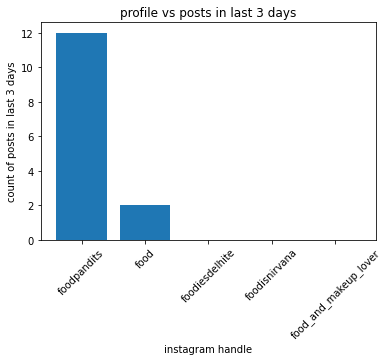

In [104]:
plt.bar(x,y)
plt.xticks(rotation = 45)
plt.title("profile vs posts in last 3 days")
plt.xlabel("instagram handle")
plt.ylabel("count of posts in last 3 days")
plt.show()

### function to find frequency of words and hashtags

In [132]:
def find_frequency(w_frequency,h_frequency,driver):
    
    driver.execute_script("window.scrollBy(0,2000)")

    try:
            time.sleep(5)
            posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_aagw")))
            posts = posts[:10]
            
            for post in posts:
                time.sleep(1)
                post.click()
                try:
                    post_text = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zr')))
                    post_text = post_text.text
                    
                    post_text = post_text.replace('\n',' ')
                    post_text = post_text.replace('?',' ')
                    post_text = post_text.replace(',',' ')
                    post_text = post_text.replace(':',' ')
                    post_text = post_text.replace('!',' ')
                    post_text = post_text.split(' ')
                    for word in post_text:
                        if len(word)==0 or word[0] == '@':
                            continue
                        if word[0] == '#':
                            h_frequency[word] = h_frequency.get(word,0) + 1
                            w_frequency[word[1:]] = w_frequency.get(word[1:],0) +1
                        else :
                             w_frequency[word] = w_frequency.get(word,0) + 1
                    
                    close = driver.find_element(By.XPATH,"//*[@aria-label='Close']")
                    close.click() 
                        
                except Exception as e:
                    logging.error(traceback.format_exc())
                
    except Exception as e:
            logging.error(traceback.format_exc())
            
            
    
    
    
   
    

In [133]:
w_frequency = {}
h_frequency = {}
for i in range(5):
    print(" i ---> ",i)
    go_to_profile(top_5_profiles[i][0],driver)
    find_frequency(w_frequency,h_frequency,driver)

 i --->  0
Handle found, going to profile page
 i --->  1
Handle found, going to profile page
 i --->  2
Handle found, going to profile page
 i --->  3
Handle found, going to profile page
 i --->  4
Handle found, going to profile page


In [134]:
w_frequency

{'foodpandits': 20,
 'Special': 1,
 'Abled': 1,
 'Girl': 1,
 'Child': 1,
 'Priyanka': 1,
 'Ka': 1,
 'New': 2,
 'Setup.': 1,
 'Location': 3,
 'Near': 1,
 'J&K': 1,
 'Bank': 1,
 'Shastri': 1,
 'Nagar': 1,
 'Jammu.': 2,
 'reels': 8,
 'streetfood': 8,
 'viral': 5,
 'womanpower': 2,
 'woman': 2,
 'instagood': 5,
 'instagram': 4,
 'daily': 3,
 'superwoman': 2,
 'streetfoodindia': 3,
 'foodblogger': 10,
 'indianblogger': 3,
 'jammublogger': 3,
 'specialchild': 1,
 'tasty': 3,
 'delicious': 5,
 'jammufood': 3,
 'food': 37,
 'reelsviral': 2,
 'reelskarofeelkaro': 2,
 'insta': 4,
 'instafood': 14,
 'foodreels': 10,
 'foodstagram': 6,
 'Edited': 16,
 '·': 16,
 '17': 1,
 'w': 38,
 'Super': 7,
 'Woman': 1,
 'Selling': 2,
 'Tasty': 1,
 'Streetfood.': 2,
 '7': 1,
 'phase': 1,
 'Mohali.': 1,
 'mohali': 1,
 'chandigarh': 1,
 'chandigarhblogger': 1,
 '25': 1,
 'Two': 1,
 'Brothers': 1,
 'Both': 1,
 'Deaf': 1,
 'and': 38,
 'Mute': 1,
 'Kunjwani': 1,
 'Chowk': 1,
 'outside': 1,
 'Indian': 1,
 'Oil': 1,
 '

In [135]:
h_frequency

{'#reels': 8,
 '#streetfood': 8,
 '#viral': 4,
 '#womanpower': 2,
 '#woman': 2,
 '#instagood': 5,
 '#instagram': 4,
 '#daily': 3,
 '#superwoman': 2,
 '#streetfoodindia': 3,
 '#foodpandits': 10,
 '#foodblogger': 10,
 '#indianblogger': 3,
 '#jammublogger': 3,
 '#specialchild': 1,
 '#tasty': 3,
 '#delicious': 3,
 '#jammufood': 3,
 '#food': 23,
 '#reelsviral': 2,
 '#reelskarofeelkaro': 2,
 '#insta': 4,
 '#instafood': 14,
 '#foodreels': 10,
 '#foodstagram': 6,
 '#mohali': 1,
 '#chandigarh': 1,
 '#chandigarhblogger': 1,
 '#hardwork': 1,
 '#hardworking': 1,
 '#brothers': 1,
 '#vocalforlocal': 1,
 '#help': 1,
 '#buylocal': 1,
 '#indianfood': 6,
 '#desikhana': 1,
 '#desifood': 2,
 '#trending': 4,
 '#indianstreetfood': 7,
 '#foodblogs': 5,
 '#couple': 1,
 '#couplegoals': 1,
 '#couplereels': 1,
 '#foodcouple': 1,
 '#foodlover': 2,
 '#viralcouple': 1,
 '#pathankotcouple': 1,
 '#lucknowfood': 1,
 '#viralfood': 1,
 '#viralvideos': 2,
 '#bornoninstagram': 2,
 '#jammustreetfood': 1,
 '#foodies': 3,
 '

In [160]:
words = w_frequency.keys()
w_f = w_frequency.values()

hashtags = h_frequency.keys()
h_f = h_frequency.values()

In [161]:
word_frame = pd.DataFrame({"words":words,"frequencies":w_f})
word_frame.reset_index(drop=True,inplace=True)
print(word_frame)

             words  frequencies
0      foodpandits           20
1          Special            1
2            Abled            1
3             Girl            1
4            Child            1
...            ...          ...
1207       comment            1
1208  cheesecake👇🏻            1
1209       Chicken            1
1210         kathi            1
1211          roll            1

[1212 rows x 2 columns]


In [162]:
word_frame.to_csv("word_frequencies.csv")

In [169]:
hashtags_frame = pd.DataFrame({"hashtags":hashtags,"frequencies":h_f})

In [170]:
print(hashtags_frame)

                           hashtags  frequencies
0                            #reels            8
1                       #streetfood            8
2                            #viral            4
3                       #womanpower            2
4                            #woman            2
..                              ...          ...
371                  #dailyfoodfeed            8
372  #yougottaeatthis#likesforlikes            8
373                      #Foodphoto            8
374                      #yummyfood            8
375          #food_and_makeup_lover            8

[376 rows x 2 columns]


In [172]:
hashtags_frame.sort_values("frequencies",ascending=False,inplace=True)
print(hashtags_frame)

            hashtags  frequencies
18             #food           23
22        #instafood           14
53           #foodie           14
252         #sodelhi           13
59         #foodporn           12
..               ...          ...
286     #trendingnow            1
285    #trendingsong            1
284       #viralsong            1
216  #instasingapore            1
188     #Sublimotion            1

[376 rows x 2 columns]


In [177]:
top_hashtags = hashtags_frame["hashtags"][:5]
hashtag_frequency = hashtags_frame["frequencies"][:5]

([<matplotlib.patches.Wedge at 0x1ed65a0d760>,
 [Text(0.6391844748848114, 0.8952336047458384, ''),
  Text(-0.8680545886354037, 0.6756339475996008, ''),
  Text(-0.9674211121378465, -0.5235421585602944, ''),
  Text(0.0454575041688909, -1.0990603328820194, ''),
  Text(0.9674211366466224, -0.5235421132720435, '')])

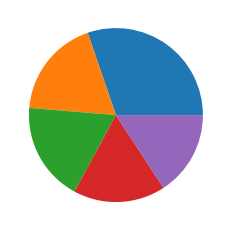

In [178]:
plt.pie(hashtag_frequency)